In [5]:
import rasterio
import numpy as np
from pathlib import Path
import osmnx as ox

In [3]:
DATASET_DIR = Path("datasets")

BUILDING_DATASET_DIR = DATASET_DIR / "building_footprints"
BUILDING_DATASET_DIR.mkdir(parents=True, exist_ok=True)

SENTINEL_DATASET_DIR = DATASET_DIR / "sentinel"

In [6]:
bologna_gdf = ox.geocode_to_gdf("Bologna, Italy")
bologna_gdf.envelope.explore()

In [7]:
bbox = {
    "north": bologna_gdf.bbox_north[0],
    "south": bologna_gdf.bbox_south[0],
    "east": bologna_gdf.bbox_east[0],
    "west": bologna_gdf.bbox_west[0]
}
bolognia_features = ox.features_from_bbox(north=bbobbx["north"], south=bbox["south"], east=bbox["east"], west=bbox["west"], tags={'building':True})

/var/folders/3d/xpgdbrds7vj7yrmsdd8vdjlw0000gn/T/ipykernel_25723/3545391186.py:7: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  bolognia_features = ox.features_from_bbox(north=bbox["north"], south=bbox["south"], east=bbox["east"], west=bbox["west"], tags={'building':True})


/Users/maxim/micromamba/envs/amls/lib/python3.10/site-packages/pandas/core/frame.py:706: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Users/maxim/micromamba/envs/amls/lib/python3.10/site-packages/geopandas/geodataframe.py:1534: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
/Users/maxim/micromamba/envs/amls/lib/python3.10/site-packages/geopandas/geodataframe.py:1534: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)


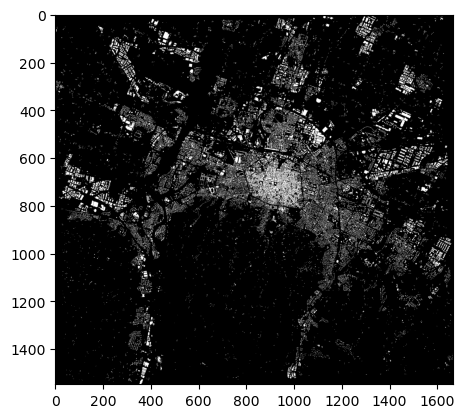

In [10]:
from rasterio.features import rasterize
import matplotlib.pyplot as plt

r_file = rasterio.open(SENTINEL_DATASET_DIR / "R.tiff")

bolognia_features = bolognia_features.to_crs(r_file.crs)

meta = r_file.meta.copy()
meta.update(compress='lzw')
with rasterio.open(BUILDING_DATASET_DIR / "footprint.tiff", "w", **meta) as f:
    buildings_raster = rasterize(
        [(geom, 1) for geom in bolognia_features.geometry],
        fill=0,
        out_shape=r_file.shape,
        transform=f.transform,
        dtype='uint8'
    )
    f.write(buildings_raster, 1)
plt.imshow(buildings_raster, cmap="gray")